# <u> Gold Price Prediction System Using RandomForestRegressor :-</u>

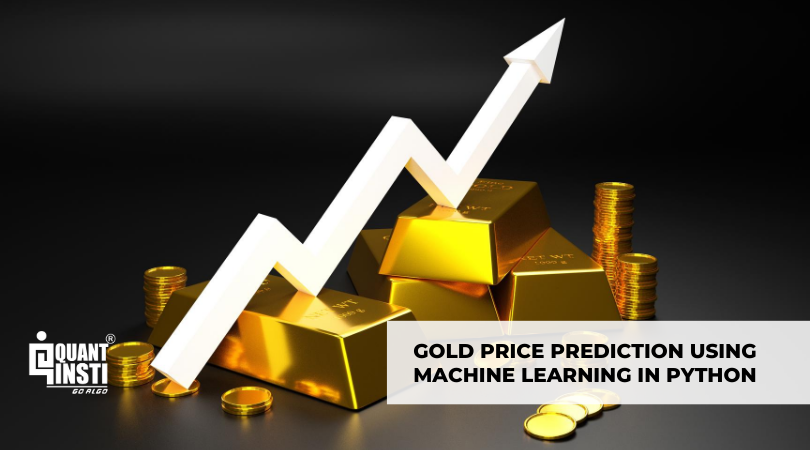

## import required libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
sns.set_style('darkgrid')

In [144]:
df=pd.read_csv('gld_price_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [145]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [146]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Checking For Missing and duplicated Values

In [147]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [148]:
df.duplicated().sum()

0

## Extracting numerical features (Years) from Date column

In [149]:

df['Date'] = pd.to_datetime(df['Date'])

df['Years']=(df['Date']).dt.year

df=df.drop(columns='Date',axis=1)


## Handling Outliers Using IQR

In [150]:
numerical_columns = df.select_dtypes(include=['float64']).columns

def remove_outliers_IQR(original_data, numerical_columns, threshold=2):
    for col in numerical_columns:
        q1 = original_data[col].quantile(0.25)
        q3 = original_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR
        outliers_mask = (original_data[col] < lower_bound) | (original_data[col] > upper_bound)
        original_data = original_data[~outliers_mask].reset_index(drop=True)
    return original_data

# Applying the function to remove outliers
new_data = remove_outliers_IQR(df, numerical_columns)

# Displaying number of outliers removed from each numerical column
for col in numerical_columns:
    outliers_removed = len(df[col]) - len(new_data[col])
    print(f"Number of outliers removed in {col}: {outliers_removed}") 

Number of outliers removed in SPX: 110
Number of outliers removed in GLD: 110
Number of outliers removed in USO: 110
Number of outliers removed in SLV: 110
Number of outliers removed in EUR/USD: 110


# Data Analysis & Visualization

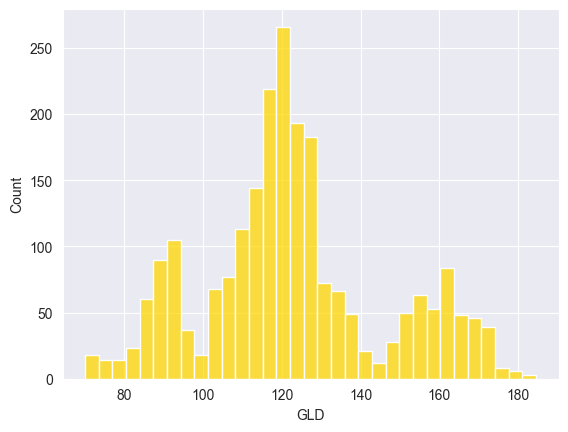

In [151]:
sns.histplot(x='GLD',data=df,color='gold')
plt.show()

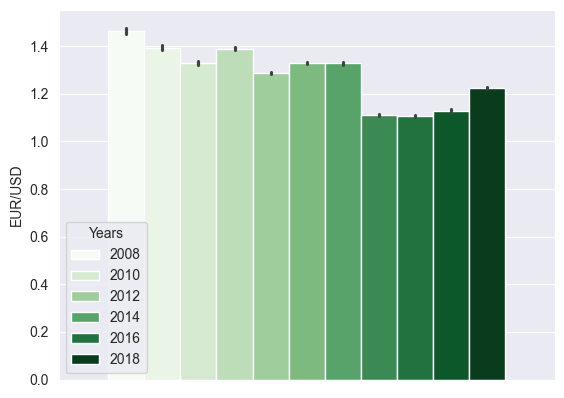

In [152]:
sns.barplot(hue='Years',y='EUR/USD',data=df,palette='Greens')
plt.show()

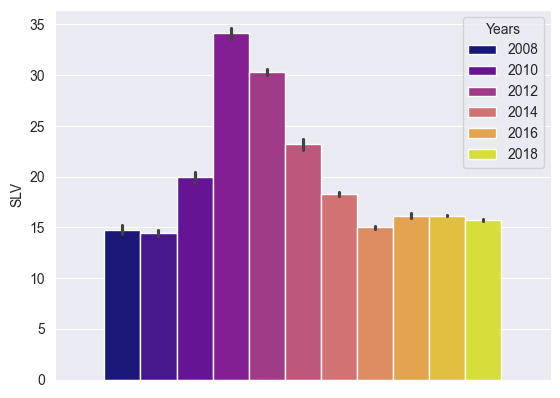

In [153]:
sns.barplot(hue='Years',y='SLV',data=df,palette='plasma')
plt.show()

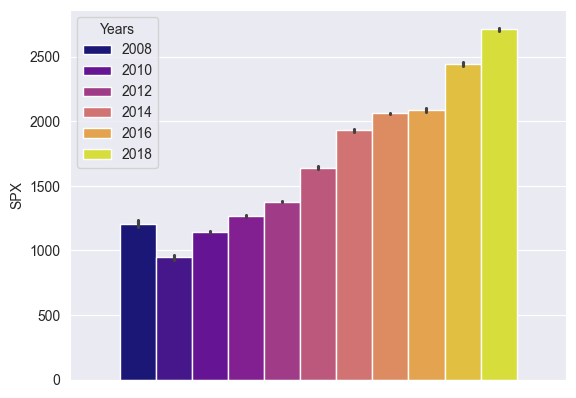

In [154]:
sns.barplot(hue='Years',y='SPX',data=df,palette='plasma')
plt.show()

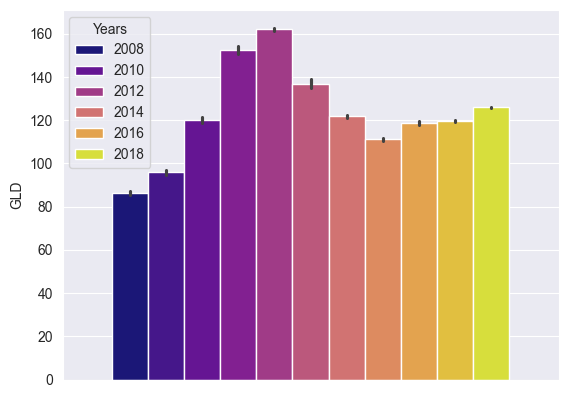

In [155]:
sns.barplot(hue='Years',y='GLD',data=df,palette='plasma')
plt.show()

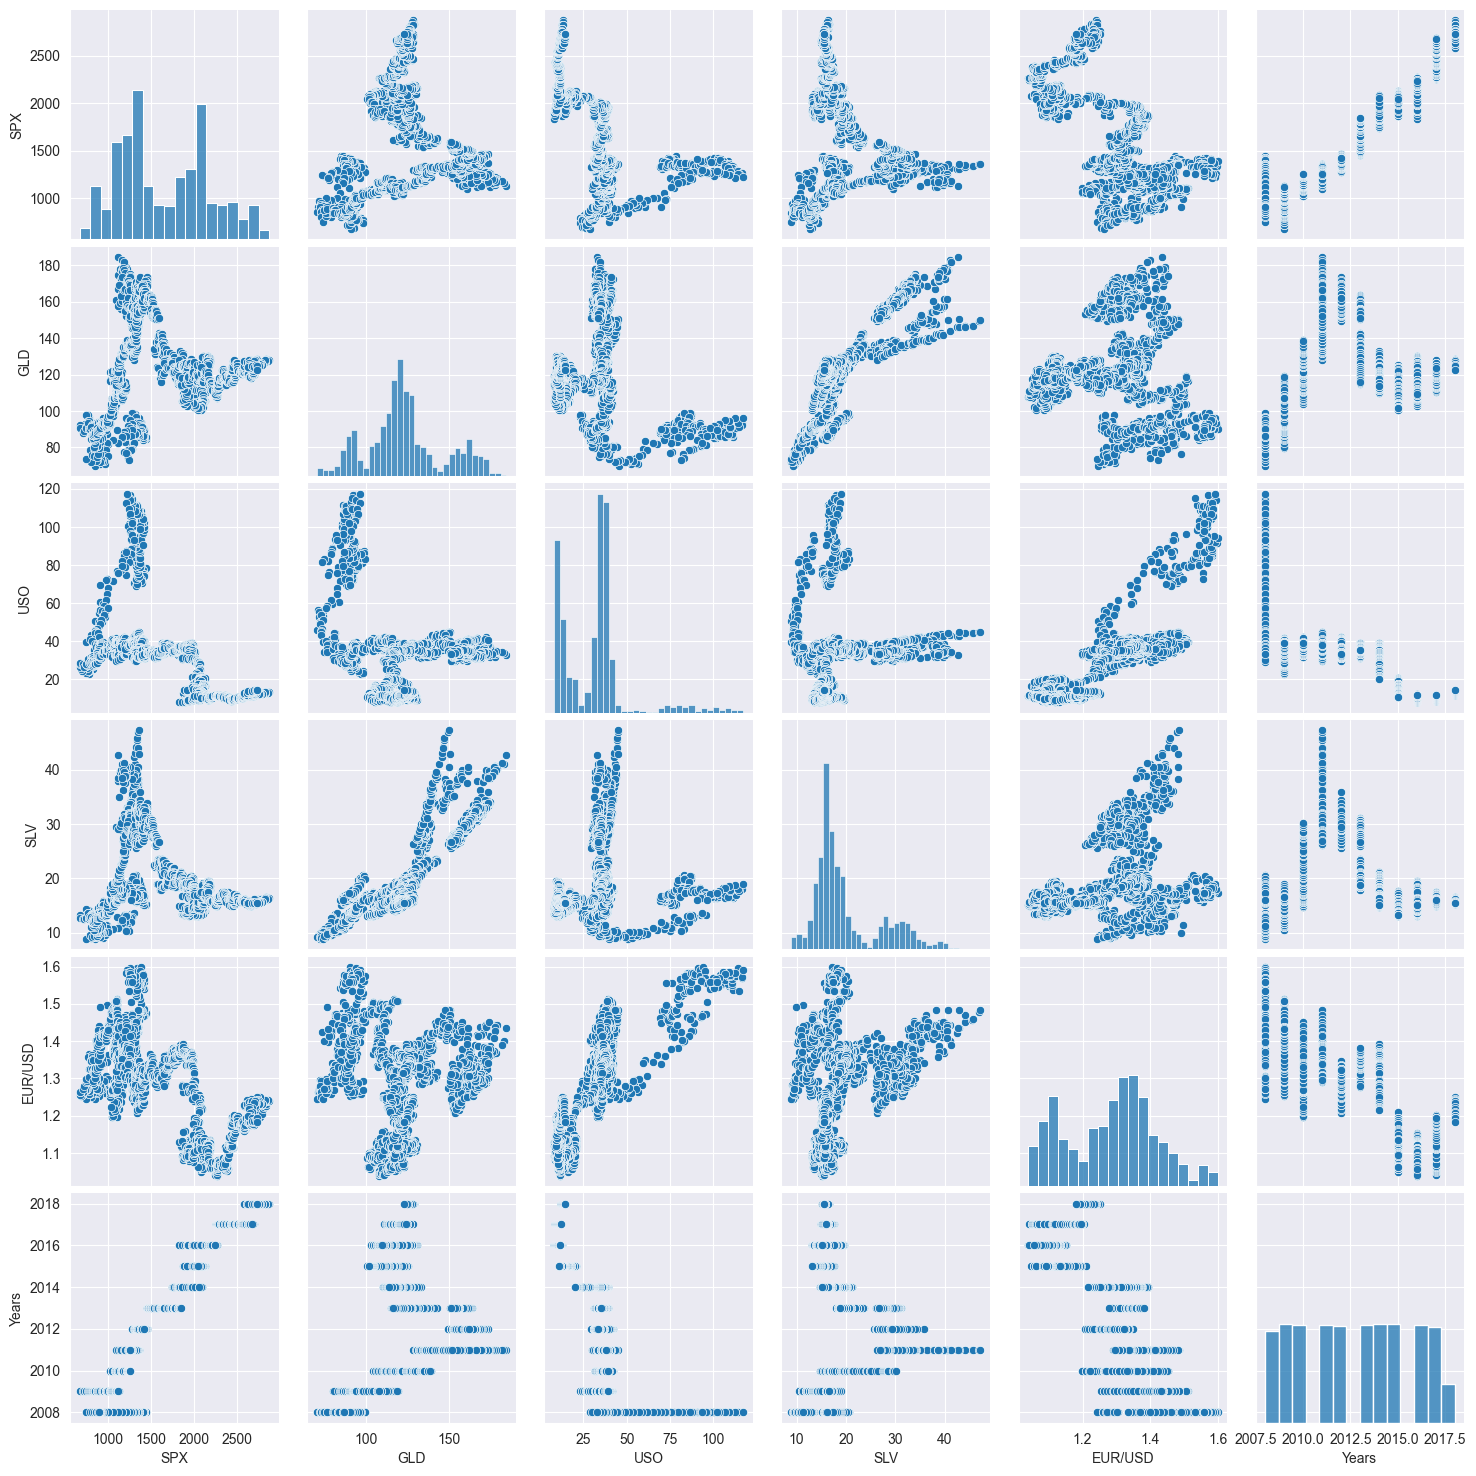

In [156]:
sns.pairplot(df)
plt.show()

## correlation between Columns

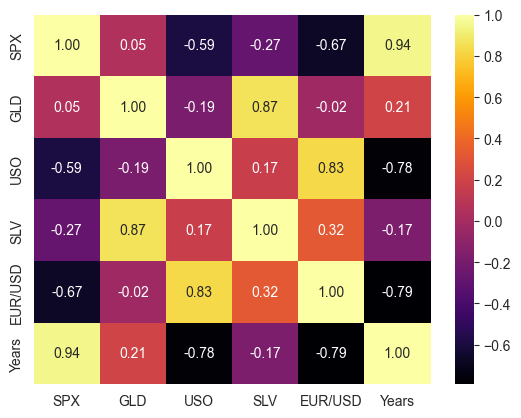

In [157]:
correlation=df.corr()
sns.heatmap(correlation,fmt='.2f',annot=True,cmap='inferno')
plt.show()

In [158]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD,Years
0,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,2008


## Determining the Features and Target 

In [159]:
x=df.drop(columns='GLD',axis=1)
y=df['GLD']

## Performing Scaling

In [160]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

## Split Data into Train and Test 

In [161]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=42)

## Creaating The Model

In [162]:
model=RandomForestRegressor()

## Train the Model

In [163]:
model.fit(train_x,train_y)
pred_y=model.predict(train_x)

## Test The Model

In [164]:
y_hat=model.predict(test_x)

## Computing The Training and Testing Mean squared error

In [165]:
Training_Loss=mean_squared_error(pred_y,train_y)
print('Training Loss',Training_Loss)

Testing_Loss=mean_squared_error(y_hat,test_y)
print('Testing Loss',Testing_Loss)

Training Loss 0.6800492105766748
Testing Loss 4.518970865425286


## Computing The Training and Testing Mean absolute error

In [166]:
Training_Loss=mean_absolute_error(pred_y,train_y)
print('Training Loss',Training_Loss)

Testing_Loss=mean_absolute_error(y_hat,test_y)
print('Testing Loss',Testing_Loss)

Training Loss 0.4741594444980423
Testing Loss 1.267753417843918


## Computing The Training and Testing R2 score

In [167]:
Training_Loss=r2_score(pred_y,train_y)
print('Training Loss',Training_Loss)

Testing_Loss=r2_score(y_hat,test_y)
print('Testing Loss',Testing_Loss)

Training Loss 0.9987331091442134
Testing Loss 0.9916157482464858


In [168]:
test_y=list(test_y)

## Comparison between Predicted and Actual Values

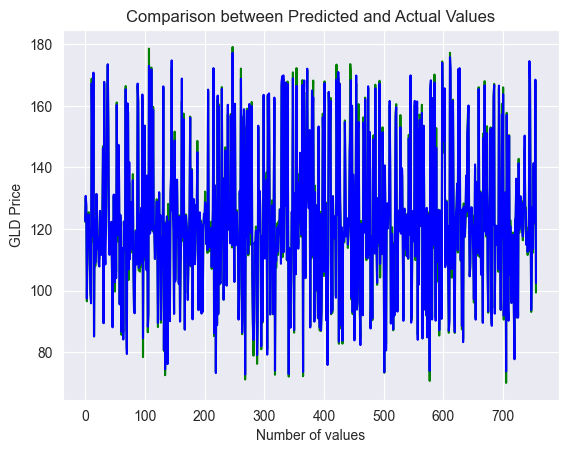

In [169]:
plt.plot(test_y,color='green',label='Actual Values')
plt.plot(y_hat,color='blue',label='Predicted Values')
plt.title('Comparison between Predicted and Actual Values')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.show()